In [7]:
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Image
from scipy.signal import welch
from scipy.ndimage import gaussian_filter1d
from scipy.signal import spectrogram

In [9]:
# Cargar audio
path_audio_cgayi     = "./audios/Calyptocephalella_gayi/audio197_label2.wav"
path_image_cgayi     = "./images/Calyptocephalella_gayi.jpg"

path_audio_pthaul    = "./audios/Pleurodema_thaul/audio1561_label21.wav"
path_image_pthaul    = "./images/Pleurodema_thaul.jpg"

path_audio_btaeniata = "./audios/Batrachyla_taeniata/audio1017_label2.wav"
path_image_btaeniata = "./images/Batrachyla_taeniata.jpg"

path_audio_bleptopus = "./audios/Batrachyla_leptopus/audio1061_label30.wav"
path_image_bleptopus = "./images/Batrachyla_leptopus.jpg"

ruta_audio_cgayi   = path_audio_cgayi
y_cgayi, sr        = librosa.load(ruta_audio_cgayi, sr=None)  # y_ = señal de specie, sr = sample rate

ruta_audio_pthaul  = path_audio_pthaul
y_pthaul, sr       = librosa.load(ruta_audio_pthaul, sr=None)

ruta_audio_btaeniata = path_audio_btaeniata
y_btaeniata, sr      = librosa.load(ruta_audio_btaeniata, sr=None)

ruta_audio_bleptopus = path_audio_bleptopus
y_bleptopus, sr      = librosa.load(ruta_audio_bleptopus, sr=None)

# Análisis en el dominio del tiempo

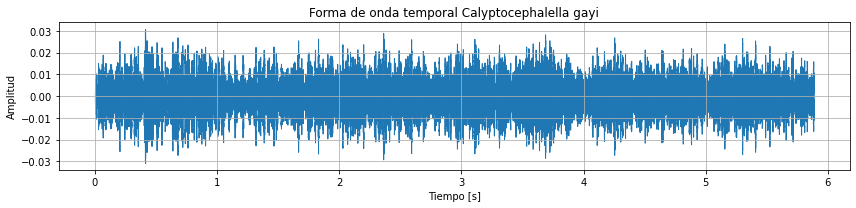

In [10]:
plt.figure(figsize=(12, 3))
librosa.display.waveshow(y_cgayi, sr=sr)
plt.title("Forma de onda temporal Calyptocephalella gayi")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

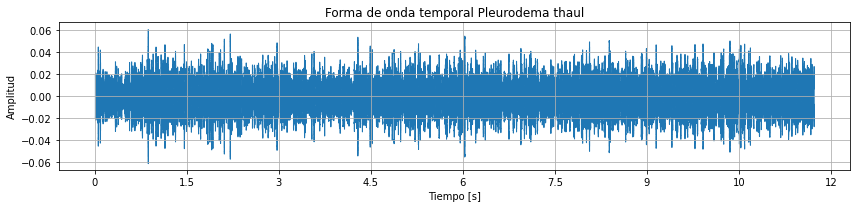

In [11]:
plt.figure(figsize=(12, 3))
librosa.display.waveshow(y_pthaul, sr=sr)
plt.title("Forma de onda temporal Pleurodema thaul")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

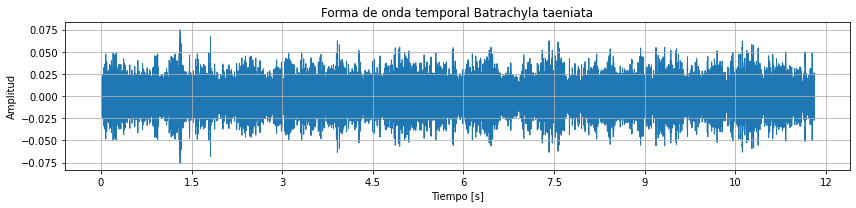

In [12]:
plt.figure(figsize=(12, 3))
librosa.display.waveshow(y_btaeniata, sr=sr)
plt.title("Forma de onda temporal Batrachyla taeniata")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

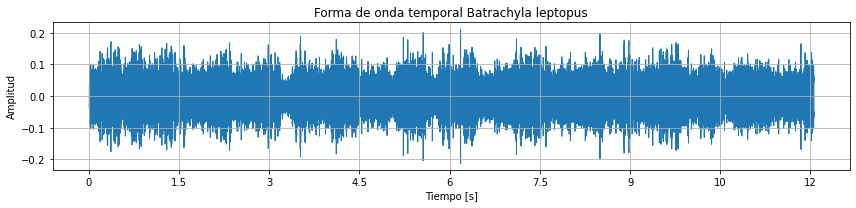

In [13]:
plt.figure(figsize=(12, 3))
librosa.display.waveshow(y_bleptopus, sr=sr)
plt.title("Forma de onda temporal Batrachyla leptopus")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

# Análisis auditivo e Imágenes de las especies

In [14]:
print("Reproduciendo Calyptocephalella gayi")
display(Audio(y_cgayi, rate=sr))

Reproduciendo Calyptocephalella gayi


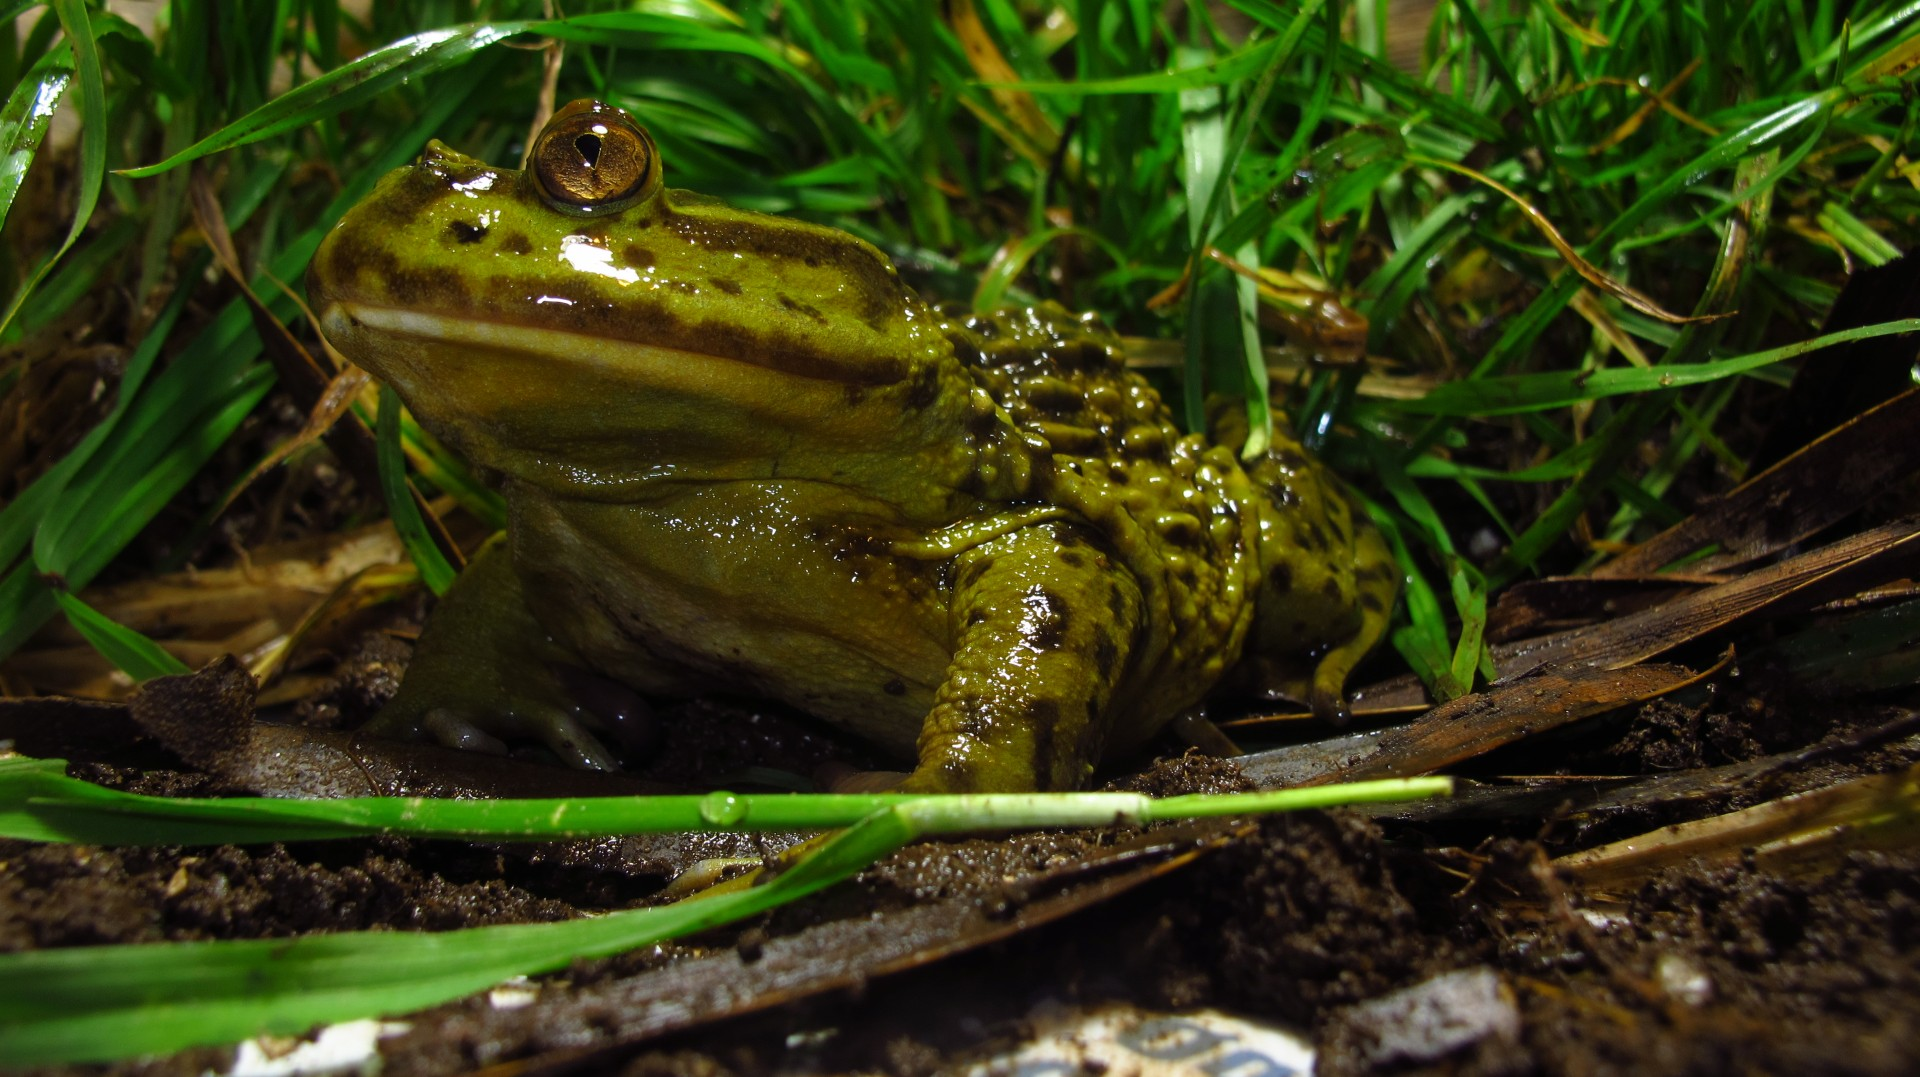

In [15]:
Image(filename='images/Calyptocephalella_gayi.jpg', width=600)

In [16]:
print("Reproduciendo Pleurodema thaul")
display(Audio(y_pthaul, rate=sr))

Reproduciendo Pleurodema thaul


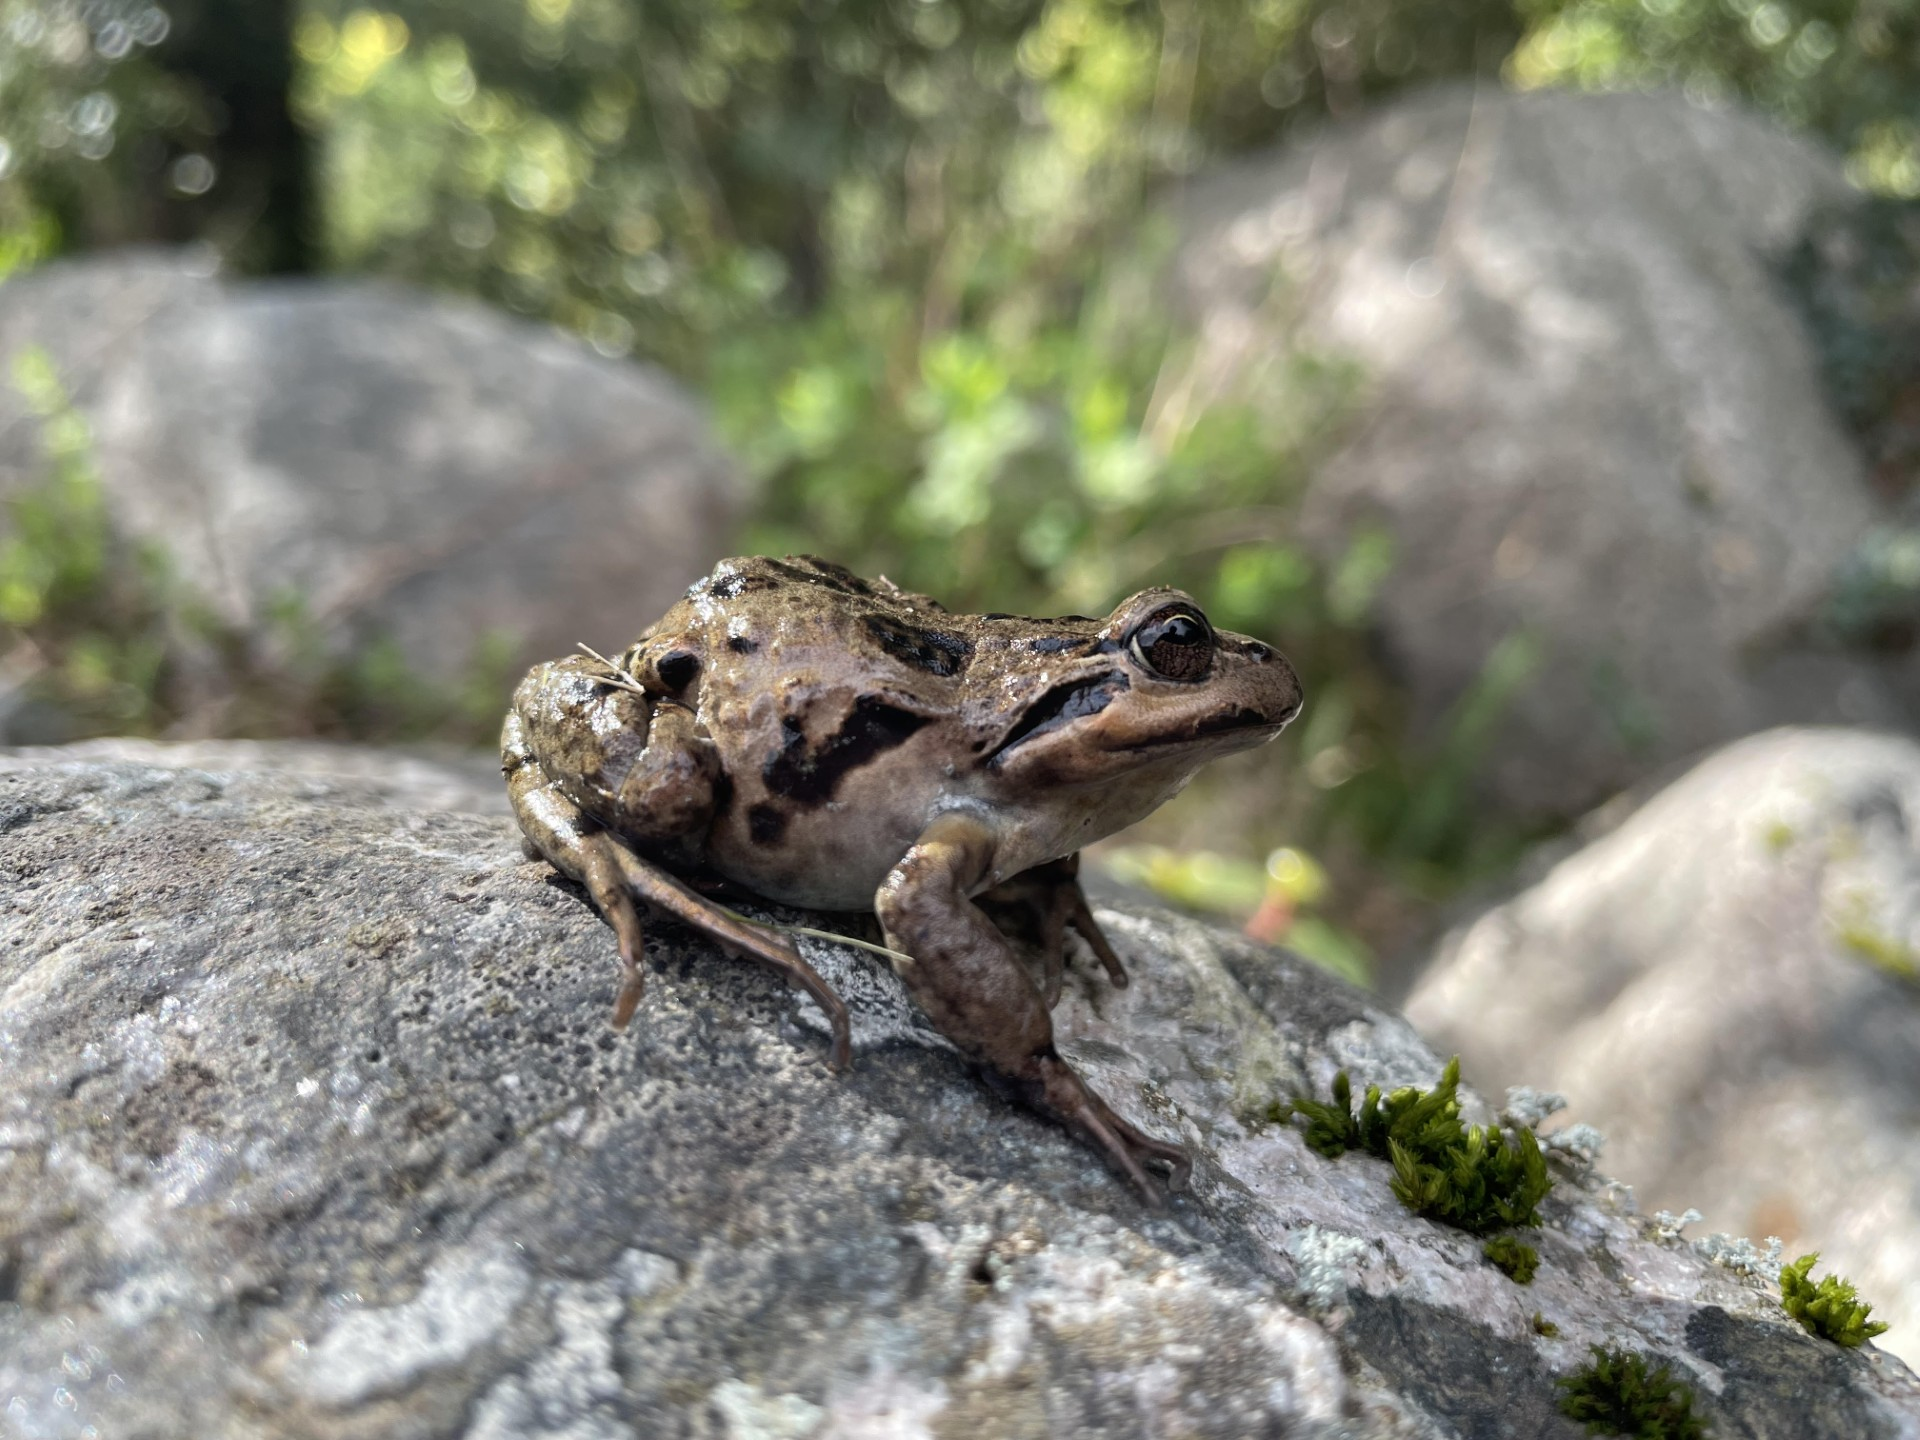

In [17]:
Image(filename='images/Pleurodema_thaul.jpg', width=600)

In [18]:
print("Reproduciendo Batrachyla taeniata")
display(Audio(y_btaeniata, rate=sr))

Reproduciendo Batrachyla taeniata


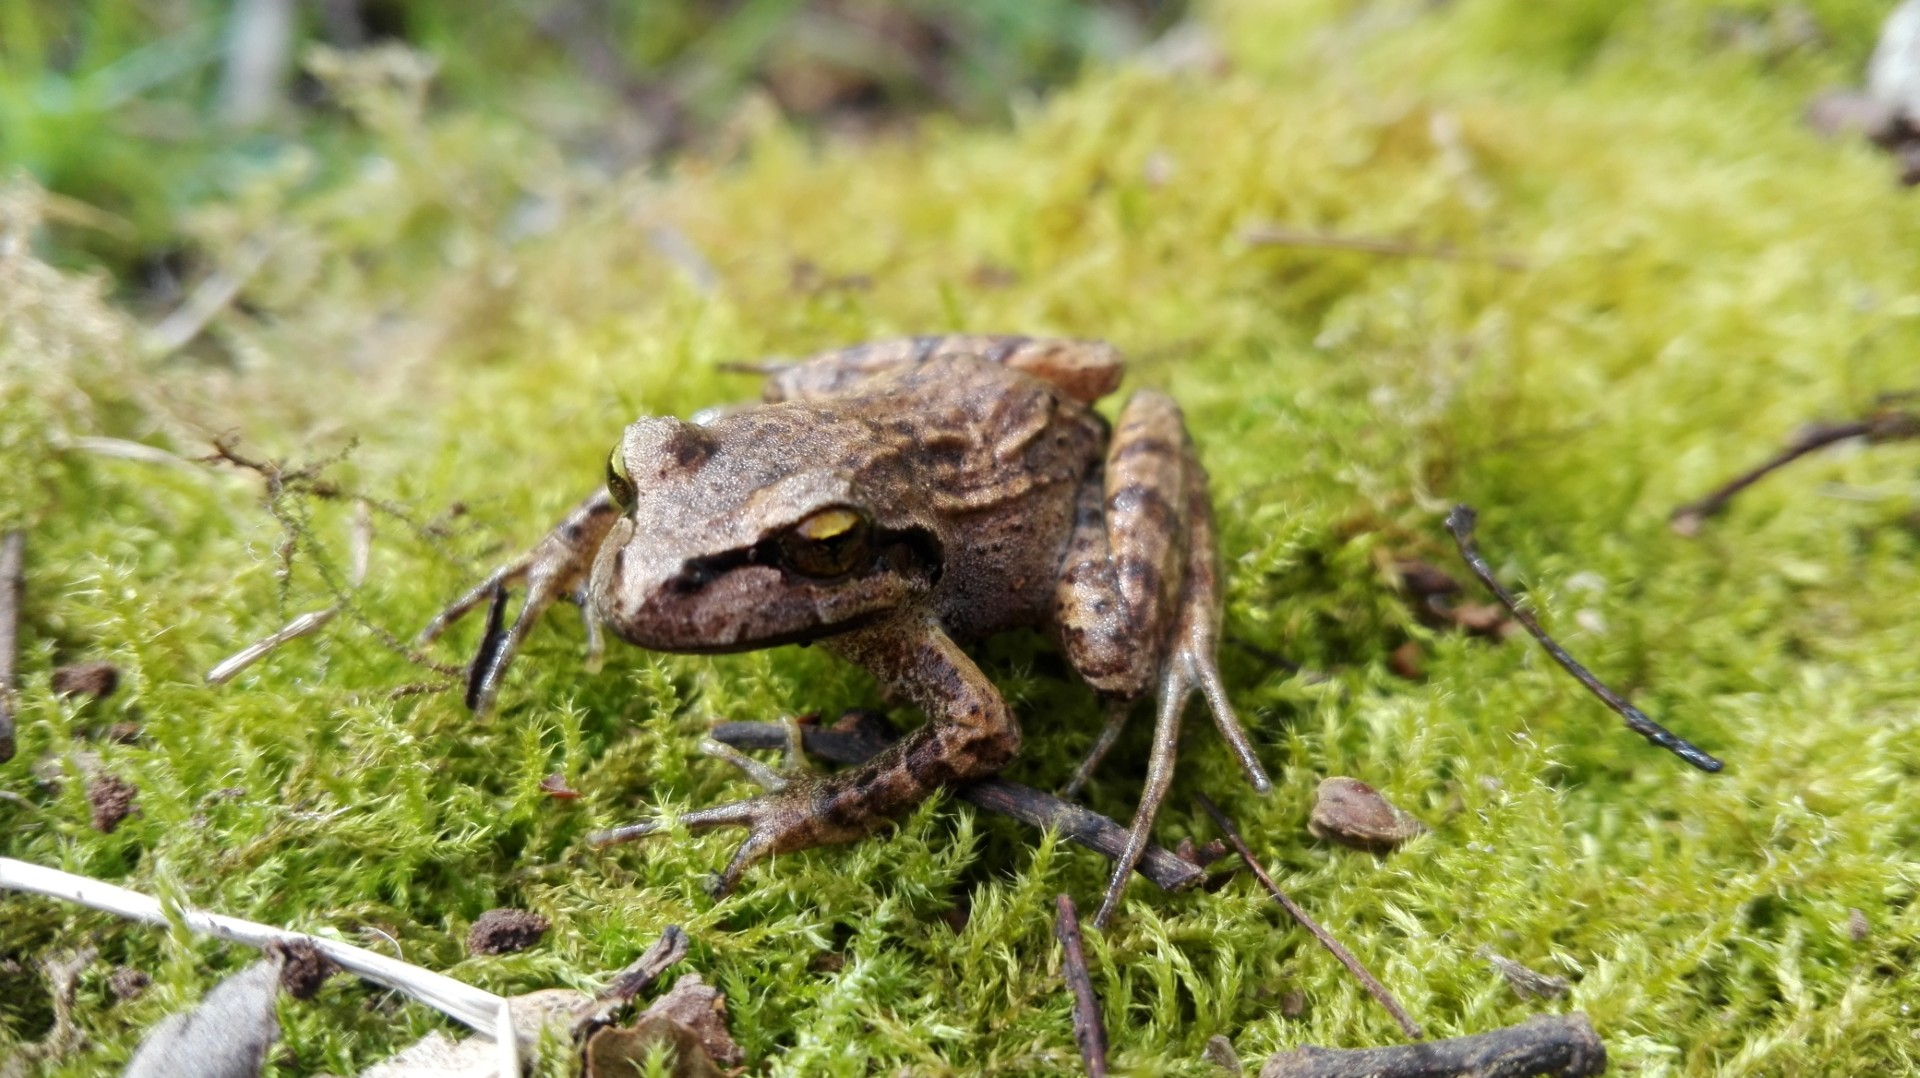

In [19]:
Image(filename='images/Batrachyla_taeniata.jpg', width=600)

In [20]:
print("Reproduciendo Batrachyla_leptopus")
display(Audio(y_bleptopus, rate=sr))

Reproduciendo Batrachyla_leptopus


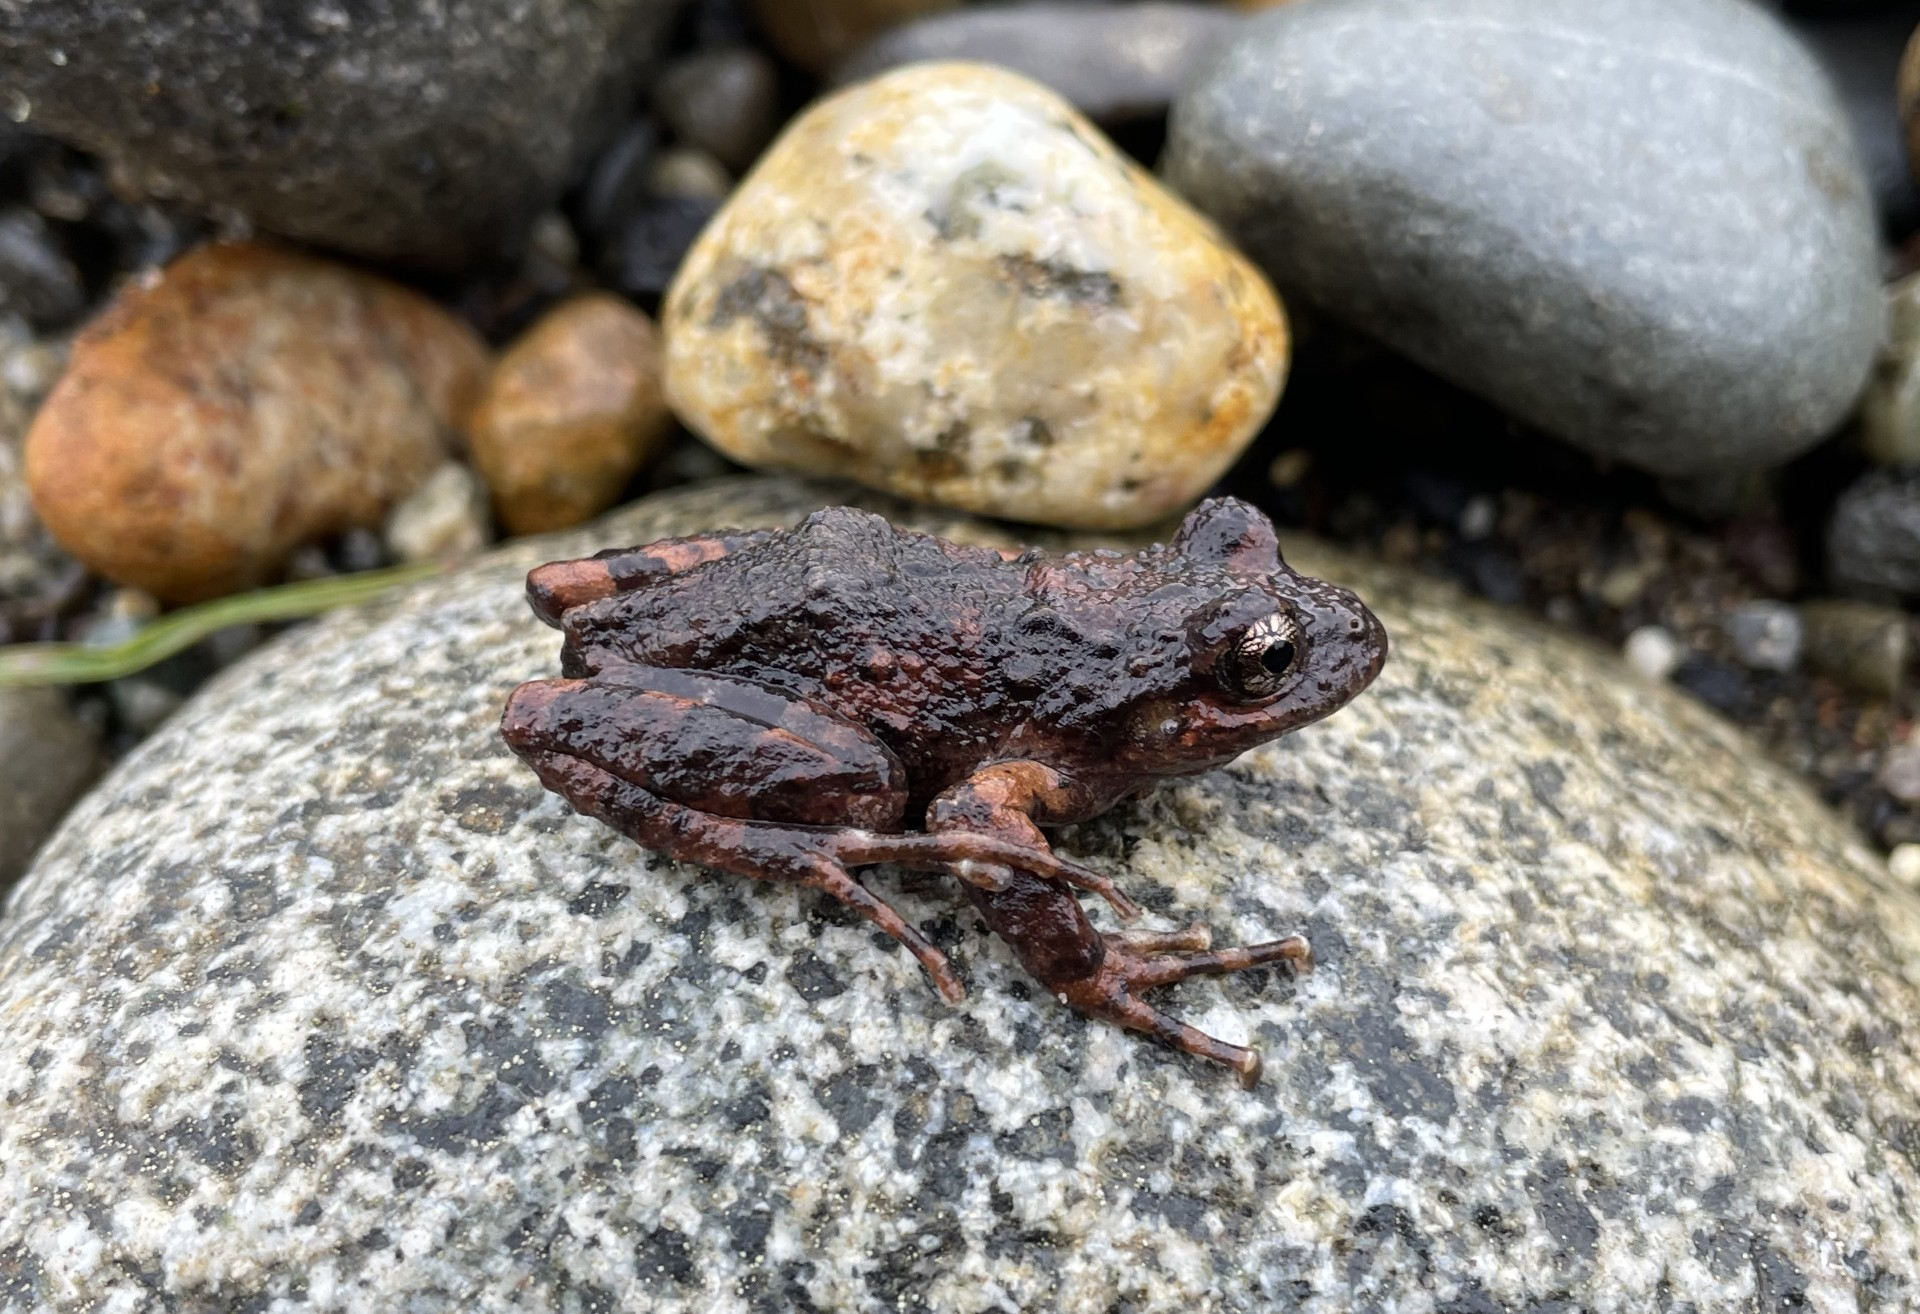

In [21]:
Image(filename='images/Batrachyla_leptopus.jpg', width=600)

# Análisis en el dominio de las frecuencias de audio

In [22]:
# Número de muestras
N = len(y_cgayi)

# Aplicar FFT
fft = np.fft.fft(y_cgayi)
frecuencias = np.fft.fftfreq(N, 1/sr)

# Tomar solo la mitad positiva (hasta Nyquist)
fft_magnitud = np.abs(fft[:N//2])
frecuencias_pos = frecuencias[:N//2]

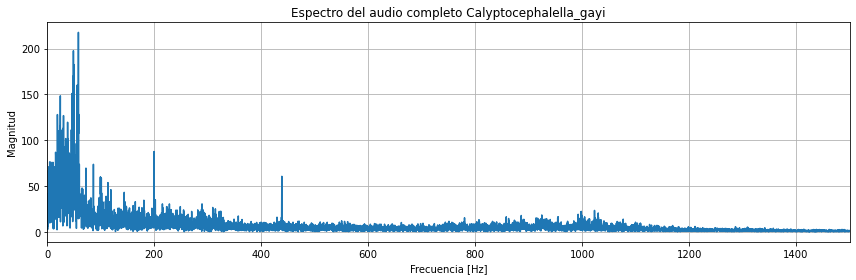

In [23]:
plt.figure(figsize=(12, 4))
plt.plot(frecuencias_pos, fft_magnitud)
plt.title("Espectro del audio completo Calyptocephalella_gayi")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim([0,1500])
plt.grid(True)
plt.tight_layout()
plt.show()

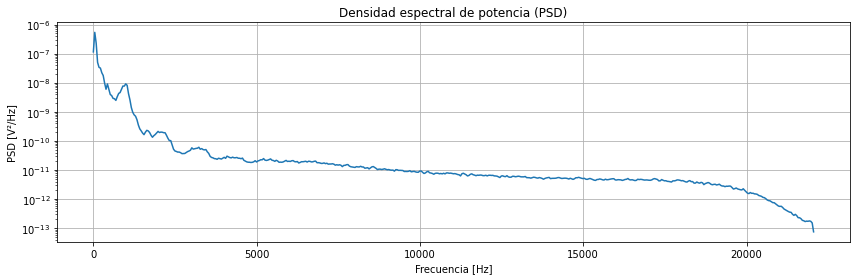

In [24]:
frecs, psd = welch(y_cgayi, fs=sr, window='hann', nperseg=1024, noverlap=512)

# 3. Visualizar
plt.figure(figsize=(12, 4))
plt.semilogy(frecs, psd)  # Escala log en eje Y
plt.title("Densidad espectral de potencia (PSD)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [V²/Hz]")
plt.grid(True)
plt.tight_layout()
plt.show()

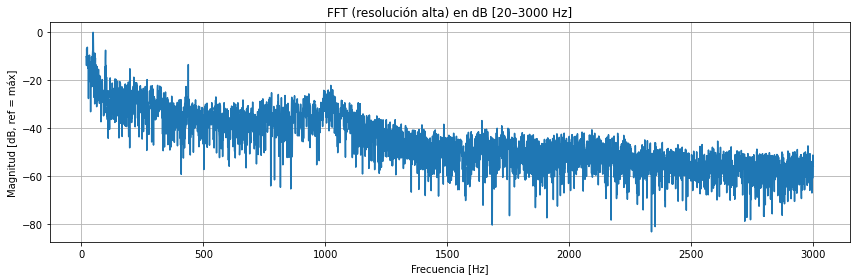

In [25]:
frecs, psd = welch(y_cgayi, fs=sr, window='hann', nperseg=8192, noverlap=4096)

# FFT directa con alta resolución
N = 2**16  # Aumentar N mejora resolución
fft_vals = np.fft.rfft(y_cgayi, n=N)
fft_freqs = np.fft.rfftfreq(N, d=1/sr)

# Convertir a dB y normalizar
fft_db = 20 * np.log10(np.abs(fft_vals))
fft_db -= np.max(fft_db)

# Filtrar el rango 20–3000 Hz
mask = (fft_freqs >= 20) & (fft_freqs <= 3000)

plt.figure(figsize=(12, 4))
plt.plot(fft_freqs[mask], fft_db[mask])
plt.title("FFT (resolución alta) en dB [20–3000 Hz]")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB, ref = máx]")
plt.grid(True)
plt.tight_layout()
plt.show()

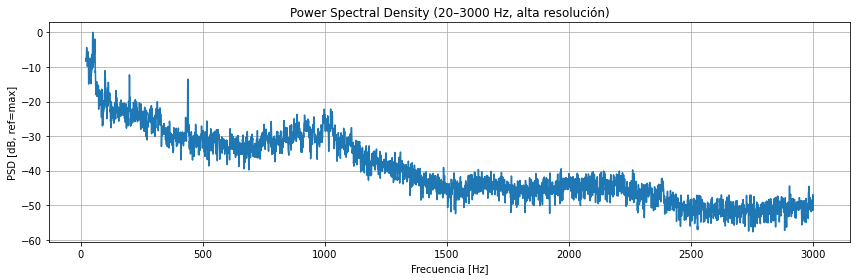

In [26]:
nperseg = 65536  # ventana larga para buena resolución (~0.67 Hz si sr=44100)
noverlap = nperseg // 2  # traslape 50%
window = 'hann'
frecs, psd = welch(y_cgayi, fs=sr, window=window, nperseg=nperseg, noverlap=noverlap)

psd_db = 10 * np.log10(psd)
psd_db -= np.max(psd_db)  # 0 dB en el máximo

mask = (frecs >= 20) & (frecs <= 3000)

plt.figure(figsize=(12, 4))
plt.plot(frecs[mask], psd_db[mask])
plt.title("Power Spectral Density (20–3000 Hz, alta resolución)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB, ref=max]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
psd_suavizada = gaussian_filter1d(psd_db[mask], sigma=5)

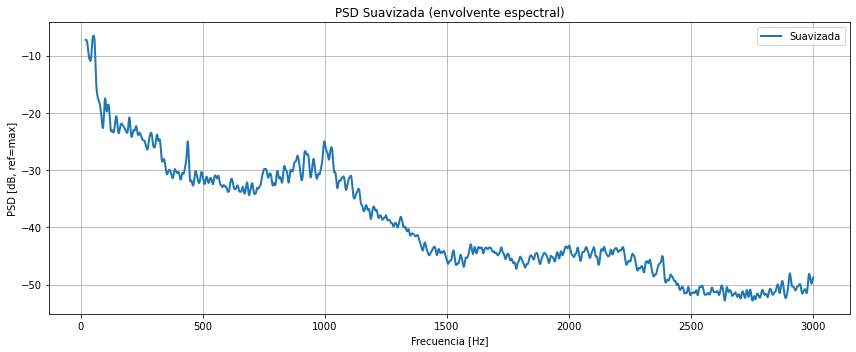

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(frecs[mask], psd_suavizada, label="Suavizada", linewidth=2)
plt.title("PSD Suavizada (envolvente espectral)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB, ref=max]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# Número de muestras
N_pthaul = len(y_pthaul)

# Aplicar FFT
fft_pthaul         = np.fft.fft(y_pthaul)
frecuencias_pthaul = np.fft.fftfreq(N_pthaul, 1/sr)

# Tomar solo la mitad positiva (hasta Nyquist)
fft_magnitud_pthaul    = np.abs(fft_pthaul[:N_pthaul//2])
frecuencias_pos_pthaul = frecuencias_pthaul[:N_pthaul//2]

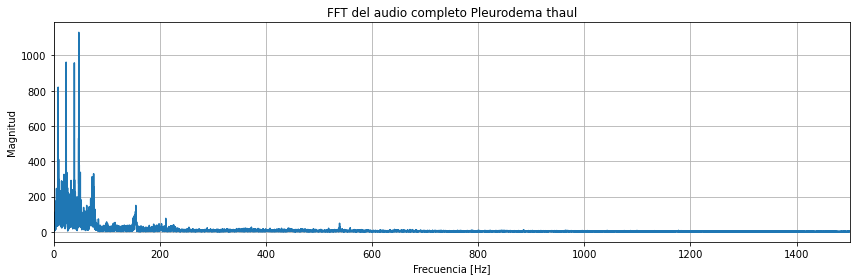

In [30]:
plt.figure(figsize=(12, 4))
plt.plot(frecuencias_pos_pthaul, fft_magnitud_pthaul)
plt.title("FFT del audio completo Pleurodema thaul")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.xlim([0,1500])
plt.grid(True)
plt.tight_layout()
plt.show()

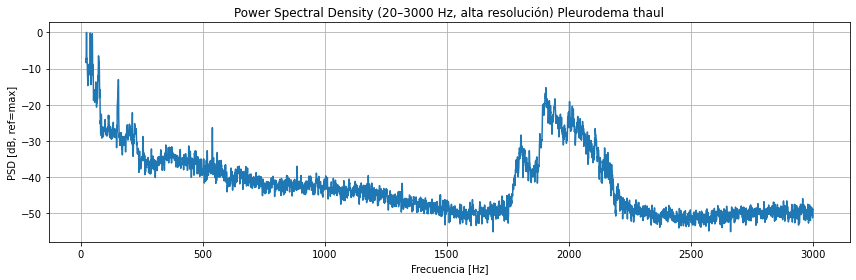

In [31]:
nperseg  = 65536  # ventana larga para buena resolución (~0.67 Hz si sr=44100)
noverlap = nperseg // 2  # traslape 50%
window  = 'hann'
frecs_pthaul, psd_pthaul = welch(y_pthaul, fs=sr, window=window, nperseg=nperseg, noverlap=noverlap)

psd_db_pthaul = 10 * np.log10(psd_pthaul)
psd_db_pthaul -= np.max(psd_db_pthaul)  # 0 dB en el máximo

mask_pthaul = (frecs_pthaul >= 20) & (frecs_pthaul <= 3000)

plt.figure(figsize=(12, 4))
plt.plot(frecs_pthaul[mask_pthaul], psd_db_pthaul[mask_pthaul])
plt.title("Power Spectral Density (20–3000 Hz, alta resolución) Pleurodema thaul")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB, ref=max]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
psd_suavizada_pthaul = gaussian_filter1d(psd_db_pthaul[mask_pthaul], sigma=5)

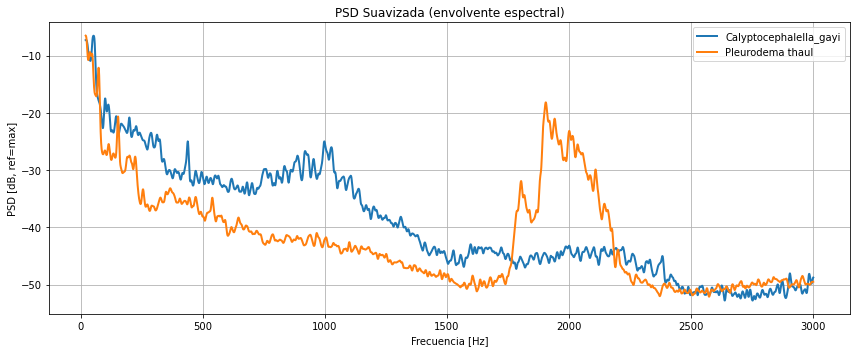

In [33]:
plt.figure(figsize=(12, 5))
plt.plot(frecs[mask], psd_suavizada, label="Calyptocephalella_gayi", linewidth=2)
plt.plot(frecs[mask_pthaul], psd_suavizada_pthaul, label="Pleurodema thaul", linewidth=2)
plt.title("PSD Suavizada (envolvente espectral)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB, ref=max]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
y_btaeniata, sr = librosa.load(path_audio_btaeniata, sr=None)  # sr = frecuencia de muestreo
print(f"Duración: {len(y_btaeniata)/sr:.2f} segundos")

Duración: 11.80 segundos


In [35]:
# Número de muestras
N_btaeniata = len(y_btaeniata)

# Aplicar FFT
fft_btaeniata          = np.fft.fft(y_btaeniata)
frecuencias_btaeniata  = np.fft.fftfreq(N_btaeniata, 1/sr)

# Tomar solo la mitad positiva (hasta Nyquist)
fft_magnitud_btaeniata = np.abs(fft_btaeniata[:N_btaeniata//2])
frecuencias_pos_btaeniata = frecuencias_btaeniata[:N_btaeniata//2]

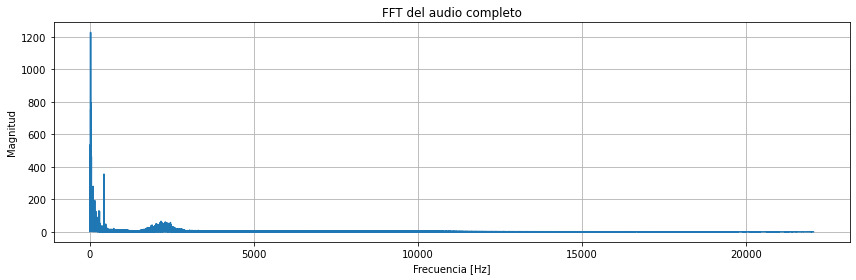

In [36]:
plt.figure(figsize=(12, 4))
plt.plot(frecuencias_pos_btaeniata, fft_magnitud_btaeniata)
plt.title("FFT del audio completo")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.tight_layout()
plt.show()

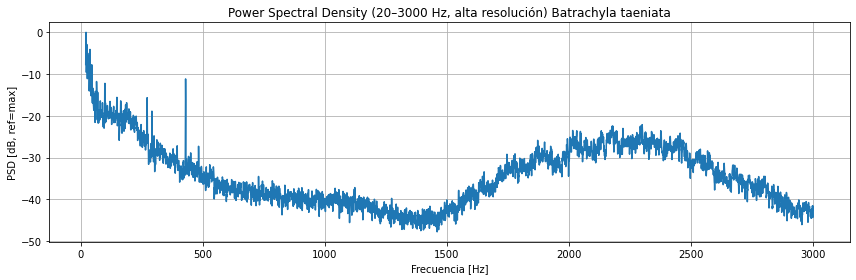

In [37]:
nperseg  = 65536  # ventana larga para buena resolución (~0.67 Hz si sr=44100)
noverlap = nperseg // 2  # traslape 50%
window  = 'hann'
frecs_btaeniata, psd_btaeniata = welch(y_btaeniata, fs=sr, window=window, nperseg=nperseg, noverlap=noverlap)

psd_db_btaeniata = 10 * np.log10(psd_btaeniata)
psd_db_btaeniata -= np.max(psd_db_btaeniata)  # 0 dB en el máximo

mask_btaeniata = (frecs_btaeniata >= 20) & (frecs_btaeniata <= 3000)

plt.figure(figsize=(12, 4))
plt.plot(frecs_btaeniata[mask_btaeniata], psd_db_btaeniata[mask_btaeniata])
plt.title("Power Spectral Density (20–3000 Hz, alta resolución) Batrachyla taeniata")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB, ref=max]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
psd_suavizada_btaeniata = gaussian_filter1d(psd_db_btaeniata[mask_btaeniata], sigma=5)

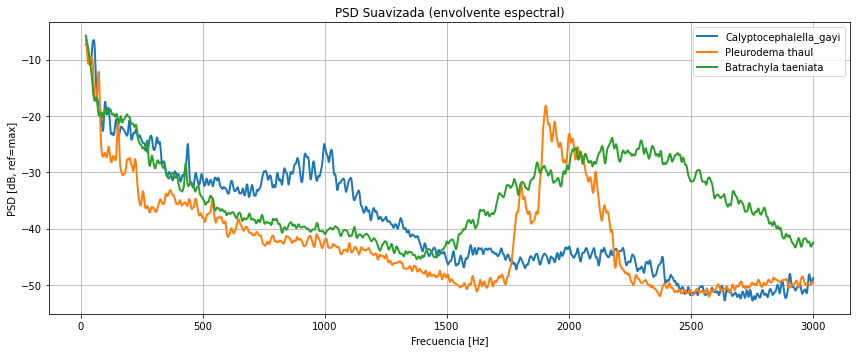

In [39]:
plt.figure(figsize=(12, 5))
plt.plot(frecs[mask], psd_suavizada, label="Calyptocephalella_gayi", linewidth=2)
plt.plot(frecs[mask_pthaul], psd_suavizada_pthaul, label="Pleurodema thaul", linewidth=2)
plt.plot(frecs[mask_btaeniata], psd_suavizada_btaeniata, label="Batrachyla taeniata", linewidth=2)
plt.title("PSD Suavizada (envolvente espectral)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB, ref=max]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
y_bleptopus, sr = librosa.load(path_audio_bleptopus, sr=None)  # sr = frecuencia de muestreo
print(f"Duración: {len(y_bleptopus)/sr:.2f} segundos")

Duración: 12.05 segundos


In [41]:
# Número de muestras
N_bleptopus = len(y_bleptopus)

# Aplicar FFT
fft_bleptopus          = np.fft.fft(y_bleptopus)
frecuencias_bleptopus  = np.fft.fftfreq(N_bleptopus, 1/sr)

# Tomar solo la mitad positiva (hasta Nyquist)
fft_magnitud_bleptopus    = np.abs(fft_bleptopus[:N_bleptopus//2])
frecuencias_pos_bleptopus = frecuencias_bleptopus[:N_bleptopus//2]

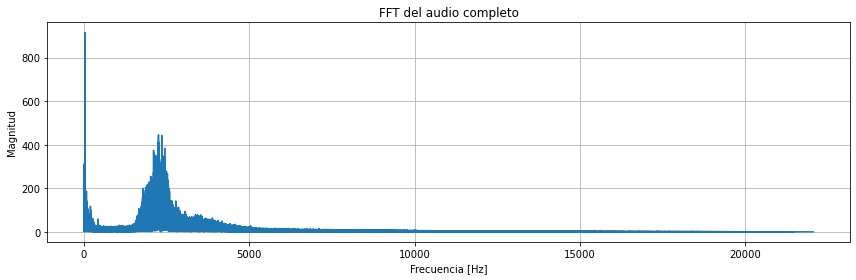

In [42]:
plt.figure(figsize=(12, 4))
plt.plot(frecuencias_pos_bleptopus, fft_magnitud_bleptopus)
plt.title("FFT del audio completo")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.tight_layout()
plt.show()

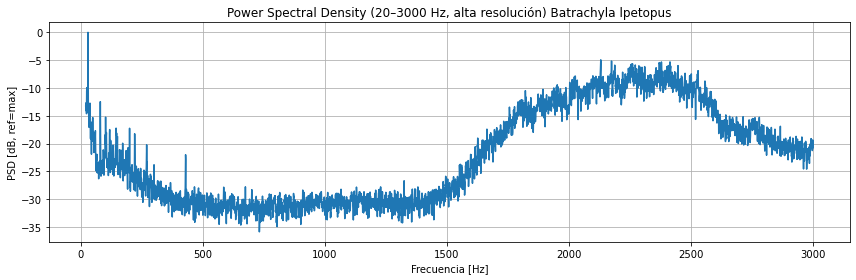

In [43]:
nperseg  = 65536  # ventana larga para buena resolución (~0.67 Hz si sr=44100)
noverlap = nperseg // 2  # traslape 50%
window  = 'hann'
frecs_bleptopus, psd_bleptopus = welch(y_bleptopus, fs=sr, window=window, nperseg=nperseg, noverlap=noverlap)

psd_db_bleptopus = 10 * np.log10(psd_bleptopus)
psd_db_bleptopus -= np.max(psd_db_bleptopus)  # 0 dB en el máximo

mask_bleptopus = (frecs_bleptopus >= 20) & (frecs_bleptopus <= 3000)

plt.figure(figsize=(12, 4))
plt.plot(frecs_bleptopus[mask_bleptopus], psd_db_bleptopus[mask_bleptopus])
plt.title("Power Spectral Density (20–3000 Hz, alta resolución) Batrachyla lpetopus")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB, ref=max]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
psd_suavizada_bleptopus = gaussian_filter1d(psd_db_bleptopus[mask_bleptopus], sigma=5)

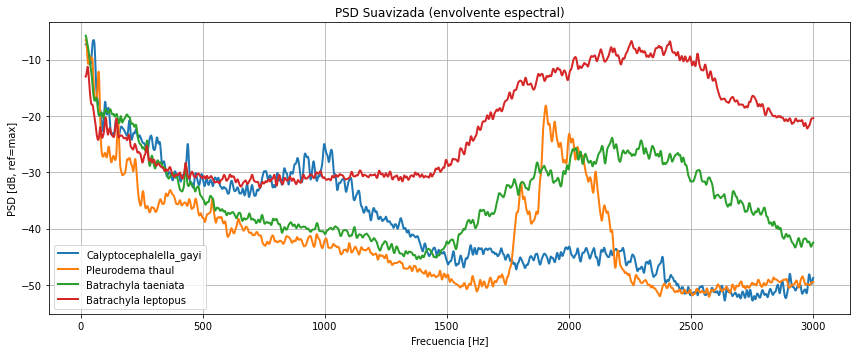

In [45]:
plt.figure(figsize=(12, 5))
plt.plot(frecs[mask], psd_suavizada, label="Calyptocephalella_gayi", linewidth=2)
plt.plot(frecs[mask_pthaul], psd_suavizada_pthaul, label="Pleurodema thaul", linewidth=2)
plt.plot(frecs[mask_btaeniata], psd_suavizada_btaeniata, label="Batrachyla taeniata", linewidth=2)
plt.plot(frecs[mask_bleptopus], psd_suavizada_bleptopus, label="Batrachyla leptopus", linewidth=2)
plt.title("PSD Suavizada (envolvente espectral)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD [dB, ref=max]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

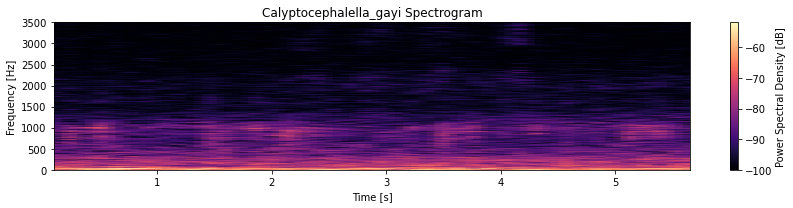

In [46]:
nperseg  = 8192    # ventana de 100 ms → buena resolución en frecuencia
noverlap = int(0.05 * sr)  # 50% de solapamiento
nfft = nperseg                # más puntos FFT → mejor resolución frecuencia
window = 'hann'            # ventana Hann

# Calcular espectrograma
f, t, Sxx = spectrogram(y_cgayi, sr, window=window, nperseg=nperseg,
                        noverlap=noverlap, nfft=nfft, scaling='density')

# Convertir a dB
Sxx_dB = 10 * np.log10(Sxx + 1e-10)

# Visualizar
plt.figure(figsize=(12, 3))
plt.pcolormesh(t, f, Sxx_dB, shading='gouraud', cmap='magma')
plt.colorbar(label='Power Spectral Density [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.ylim(0, 3500)  # Puedes ajustar a 3000 si quieres centrarte en ese rango
plt.title('Calyptocephalella_gayi Spectrogram')
plt.tight_layout()
plt.show()

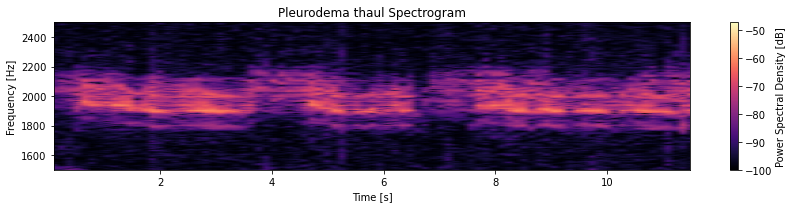

In [47]:
nperseg  = 8192    # ventana de 100 ms → buena resolución en frecuencia
noverlap = int(0.05 * sr)  # 50% de solapamiento
nfft = nperseg                # más puntos FFT → mejor resolución frecuencia
window = 'hann'            # ventana Hann

# Calcular espectrograma
f_pthaul, t_pthaul, Sxx_pthaul = spectrogram(y_pthaul, sr, window=window, nperseg=nperseg,
                        noverlap=noverlap, nfft=nfft, scaling='density')

# Convertir a dB
Sxx_dB_pthaul = 10 * np.log10(Sxx_pthaul + 1e-10)

# Visualizar
plt.figure(figsize=(12, 3))
plt.pcolormesh(t_pthaul, f_pthaul, Sxx_dB_pthaul, shading='gouraud', cmap='magma')
plt.colorbar(label='Power Spectral Density [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.ylim(1500, 2500)  # Puedes ajustar a 3000 si quieres centrarte en ese rango
plt.title('Pleurodema thaul Spectrogram')
plt.tight_layout()
plt.show()

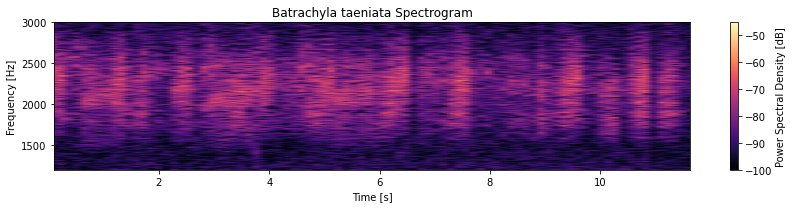

In [48]:
nperseg  = 8192    # ventana de 100 ms → buena resolución en frecuencia
noverlap = int(0.05 * sr)  # 50% de solapamiento
nfft = nperseg                # más puntos FFT → mejor resolución frecuencia
window = 'hann'            # ventana Hann

# Calcular espectrograma
f_btaeniata, t_btaeniata, Sxx_btaeniata = spectrogram(y_btaeniata, sr, window=window, nperseg=nperseg,
                        noverlap=noverlap, nfft=nfft, scaling='density')

# Convertir a dB
Sxx_dB_btaeniata = 10 * np.log10(Sxx_btaeniata + 1e-10)

# Visualizar
plt.figure(figsize=(12, 3))
plt.pcolormesh(t_btaeniata, f_btaeniata, Sxx_dB_btaeniata, shading='gouraud', cmap='magma')
plt.colorbar(label='Power Spectral Density [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.ylim(1200, 3000)  # Puedes ajustar a 3000 si quieres centrarte en ese rango
plt.title('Batrachyla taeniata Spectrogram')
plt.tight_layout()
plt.show()

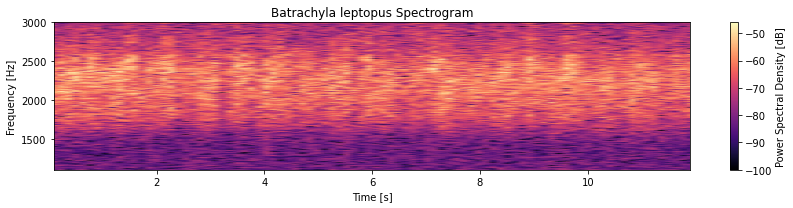

In [49]:
nperseg  = 8192    # ventana de 100 ms → buena resolución en frecuencia
noverlap = int(0.05 * sr)  # 50% de solapamiento
nfft = nperseg                # más puntos FFT → mejor resolución frecuencia
window = 'hann'            # ventana Hann

# Calcular espectrograma
f_bleptopus, t_bleptopus, Sxx_bleptopus = spectrogram(y_bleptopus, sr, window=window, nperseg=nperseg,
                        noverlap=noverlap, nfft=nfft, scaling='density')

# Convertir a dB
Sxx_dB_bleptopus = 10 * np.log10(Sxx_bleptopus + 1e-10)

# Visualizar
plt.figure(figsize=(12, 3))
plt.pcolormesh(t_bleptopus, f_bleptopus, Sxx_dB_bleptopus, shading='gouraud', cmap='magma')
plt.colorbar(label='Power Spectral Density [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.ylim(1100, 3000)  # Puedes ajustar a 3000 si quieres centrarte en ese rango
plt.title('Batrachyla leptopus Spectrogram')
plt.tight_layout()
plt.show()